# Задание 1

Скачайте датасет Kaggle electronic_devices_sales.

Задание 1

На основании датасета для каждого покупателя получите:

 а) предпочитаемый метод оплаты; 
 
 б) общие траты;
 
 в) количество денег, потраченных на дополнительные услуги и аксессуары.

In [40]:
# импорт библиотек для работы 
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('Electronic_sales_Sep2023-Sep2024.csv')

### Подготовка датасета к работе

In [24]:
print("\tИНФОРМАЦИЯ О ДАТАСЕТЕ ")
print(f"\nВсего записей: {len(df)}")
print(f"Всего уникальных покупателей: {df['Customer ID'].nunique()}")
print(f"Пропуски в данных:\n")
print(df.isnull().sum())

print("\n\t СТАТИСТИКА ПО ЧИСЛОВЫМ ПОЛЯМ ")
display(df[['Total Price', 'Unit Price', 'Quantity', 'Add-on Total']].describe())

print("\n\t ПЕРВЫЕ 10 ЗАПИСЕЙ ")
display(df.head(10))

	ИНФОРМАЦИЯ О ДАТАСЕТЕ 

Всего записей: 20000
Всего уникальных покупателей: 12136
Пропуски в данных:

Customer ID             0
Age                     0
Gender                  1
Loyalty Member          0
Product Type            0
SKU                     0
Rating                  0
Order Status            0
Payment Method          0
Total Price             0
Unit Price              0
Quantity                0
Purchase Date           0
Shipping Type           0
Add-ons Purchased    4868
Add-on Total            0
dtype: int64

	 СТАТИСТИКА ПО ЧИСЛОВЫМ ПОЛЯМ 


,Total Price,Unit Price,Quantity,Add-on Total
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,3180.133419,578.631867,5.485550,62.244848
std,2544.978675,312.274076,2.870854,58.058431
min,20.750000,20.750000,1.000000,0.000000
25%,1139.680000,361.180000,3.000000,7.615000
50%,2534.490000,463.960000,5.000000,51.700000
75%,4639.600000,791.190000,8.000000,93.842500
max,11396.800000,1139.680000,10.000000,292.770000



	 ПЕРВЫЕ 10 ЗАПИСЕЙ 


,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56
5,1004,41,Female,No,Smartphone,SKU1001,5,Completed,Credit Card,83.00,20.75,4,2024-05-26,Standard,"Impulse Item,Accessory",65.78
6,1005,25,Female,No,Smartwatch,SKU1003,3,Completed,Paypal,7603.47,844.83,9,2024-01-30,Overnight,NaN,0.00
7,1005,25,Female,No,Laptop,SKU1005,3,Completed,Debit Card,4175.64,463.96,9,2024-06-24,Overnight,"Extended Warranty,Extended Warranty",75.33
8,1006,24,Male,No,Smartphone,SKU1004,2,Cancelled,Debit Card,5538.33,791.19,7,2023-10-03,Standard,Impulse Item,43.05
9,1006,24,Male,Yes,Laptop,SKU1005,3,Completed,Cash,4175.64,463.96,9,2024-01-01,Express,NaN,0.00


In [30]:
# создание копии датасета
df_copy = df.copy()

# Заполним пропуски в Add-ons Purchased (если Add-on Total > 0, значит допы были)
df_copy['Add-ons Purchased'] = df_copy['Add-ons Purchased'].fillna('No Add-ons')

In [31]:
# Проверка: есть ли отмененные заказы
print("\tСТАТУСЫ ЗАКАЗОВ")
order_status_counts = df_copy['Order Status'].value_counts()
print(order_status_counts)

	СТАТУСЫ ЗАКАЗОВ
Completed    13432
Cancelled     6568
Name: Order Status, dtype: int64


In [54]:
# учитываем только завершенные заказы
df_completed = df_copy[df_copy['Order Status'] == 'Completed'].copy()

# При работе с данными оплаты было замечено, что метод оплаты PayPal и Paypal считаются как разные. Нормализуем их
df_completed['Payment Method'] = df_completed['Payment Method'].str.strip().str.title()

print(f"\nЗавершенных заказов: {len(df_completed)}")
print(f"Уникальных покупателей с завершенными заказами: {df_completed['Customer ID'].nunique()}")

print("Уникальные методы оплаты после нормализации:")
print(df_completed['Payment Method'].unique())


Завершенных заказов: 13432
Уникальных покупателей с завершенными заказами: 9466
Уникальные методы оплаты после нормализации:
['Paypal' 'Credit Card' 'Cash' 'Debit Card' 'Bank Transfer']


## Задание 1 часть 1 Предпочитаемый метод оплаты для каждого покупателя

In [49]:
# анализиурем только завершенные заказы
payment_counts = df_completed.groupby(['Customer ID', 'Payment Method']).size().reset_index(name='Transaction Count')

# Определим предпочитаемый метод оплаты как метод с наибольшим количество транзакций
preferred_payment = payment_counts.loc[payment_counts.groupby('Customer ID')['Transaction Count'].idxmax()]

In [50]:
# Если у покупателя несколько методов с одинаковым количеством транзакций, возьмем первый
preferred_payment = preferred_payment.drop_duplicates(subset=['Customer ID'], keep='first')

preferred_payment = preferred_payment[['Customer ID', 'Payment Method']].rename(
    columns={'Payment Method': 'Preferred Payment Method'})

In [51]:
print("\t Примеры покупателей\n")
display(preferred_payment.head(10))

	 Примеры покупателей



,Customer ID,Preferred Payment Method
0,1000,Paypal
1,1002,Cash
3,1003,Cash
4,1004,Credit Card
5,1005,Debit Card
7,1006,Cash
9,1008,Cash
10,1011,Credit Card
11,1014,Cash
12,1015,Paypal


In [52]:
print("=== ПРЕДПОЧИТАЕМЫЕ МЕТОДЫ ОПЛАТЫ ===")
print(f"Обработано покупателей: {len(preferred_payment)}")

# Отчет по методам оплаты
print("\n" + "="*50)
print("ОТЧЕТ: РАСПРЕДЕЛЕНИЕ МЕТОДОВ ОПЛАТЫ")
print("="*50)

# Подсчет распределения методов оплаты
payment_distribution = preferred_payment['Preferred Payment Method'].value_counts()

for method, count in payment_distribution.items():
    percentage = (count / len(preferred_payment)) * 100
    print(f"• {method}: {count} покупателей ({percentage:.1f}%)")

# Самый популярный метод
most_common_method = payment_distribution.index[0]
most_common_count = payment_distribution.iloc[0]
most_common_percentage = (most_common_count / len(preferred_payment)) * 100

print(f"\nСАМЫЙ ПОПУЛЯРНЫЙ МЕТОД ОПЛАТЫ:")
print(f"► {most_common_method} - используется {most_common_count} покупателями ({most_common_percentage:.1f}%)")

=== ПРЕДПОЧИТАЕМЫЕ МЕТОДЫ ОПЛАТЫ ===
Обработано покупателей: 9466

ОТЧЕТ: РАСПРЕДЕЛЕНИЕ МЕТОДОВ ОПЛАТЫ
• Credit Card: 2775 покупателей (29.3%)
• Paypal: 2178 покупателей (23.0%)
• Bank Transfer: 1913 покупателей (20.2%)
• Cash: 1517 покупателей (16.0%)
• Debit Card: 1083 покупателей (11.4%)

САМЫЙ ПОПУЛЯРНЫЙ МЕТОД ОПЛАТЫ:
► Credit Card - используется 2775 покупателями (29.3%)


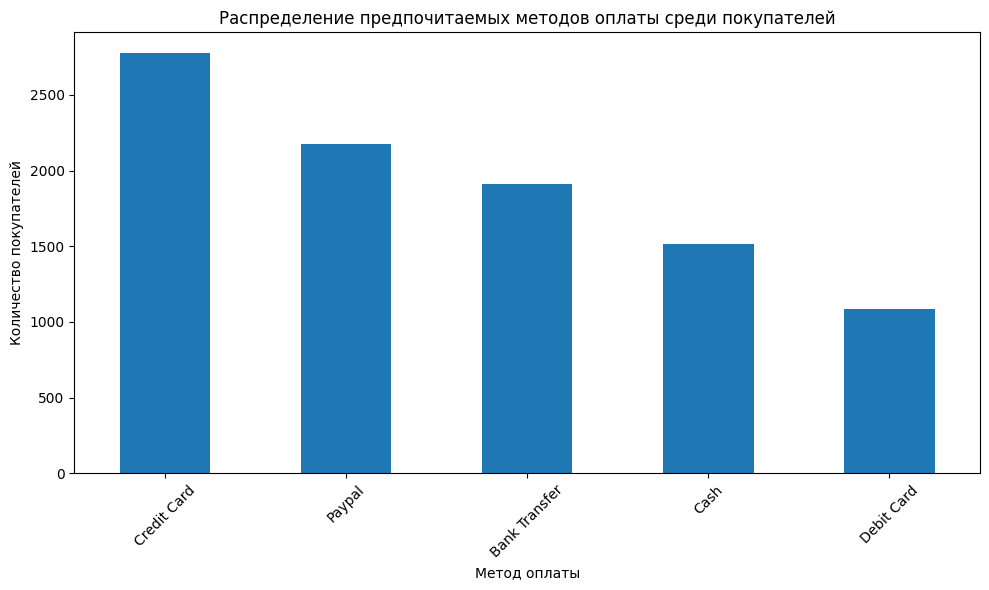

In [53]:
# Визуализация распределения методов оплаты
plt.figure(figsize=(10, 6))
preferred_payment['Preferred Payment Method'].value_counts().plot(kind='bar')
plt.title('Распределение предпочитаемых методов оплаты среди покупателей')
plt.xlabel('Метод оплаты')
plt.ylabel('Количество покупателей')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Задание 1 часть 2 общие траты

In [55]:
# Суммируем Total Price только по завершенным заказам
total_spending = df_completed.groupby('Customer ID')['Total Price'].sum().reset_index().rename(
    columns={'Total Price': 'Total Spending'}
)

In [89]:
print("=== ОБЩИЕ ТРАТЫ ПОКУПАТЕЛЕЙ ===")
print(f"Обработано покупателей: {len(total_spending)}")

# ТЕКСТОВЫЙ ОТЧЕТ 
print("\n" + "="*60)
print("СТАТИСТИКА ПО ОБЩИМ ТРАТАМ ПОКУПАТЕЛЕЙ")
print("="*60)

stats = total_spending['Total Spending'].describe()

# Выводим статистику 
print(f"Средние траты на покупателя: {stats['mean']:.2f} у.е")
print(f"Стандартное отклонение: {stats['std']:.2f} у.е")
print(f"Минимальные траты: {stats['min']:.2f} у.е")
print(f"25-й процентиль: {stats['25%']:.2f} у.е")
print(f"Медианные траты: {stats['50%']:.2f} у.е")
print(f"75-й процентил : {stats['75%']:.2f}  у.е")
print(f"Максимальные траты: {stats['max']:.2f} у.е")

# Дополнительная статистика
print(f"\nОбщая сумма всех трат: {total_spending['Total Spending'].sum():.2f}  у.е")
print(f"Самый крупный покупатель: {total_spending['Total Spending'].max():.2f}  у.е")
print(f"Самый экономный покупатель: {total_spending['Total Spending'].min():.2f}  у.е")

# Группировка по диапазонам трат
print(f"\nРАСПРЕДЕЛЕНИЕ ПОКУПАТЕЛЕЙ ПО СУММАМ ТРАТ:")
bins = [0, 1000, 5000, 10000, 20000, 50000]
labels = ['до 1,000 у.е.', '1,000-5,000 у.е', '5,000-10,000 у.е', '10,000-20,000 у.е', 'свыше 20,000 у.е']
spending_groups = pd.cut(total_spending['Total Spending'], bins=bins, labels=labels)

for label in labels:
    count = (spending_groups == label).sum()
    percentage = (count / len(total_spending)) * 100
    print(f"   • {label}: {count} чел. ({percentage:.1f}%)")

print("\n" + "="*60)

=== ОБЩИЕ ТРАТЫ ПОКУПАТЕЛЕЙ ===
Обработано покупателей: 9466

СТАТИСТИКА ПО ОБЩИМ ТРАТАМ ПОКУПАТЕЛЕЙ
Средние траты на покупателя: 4503.45 у.е
Стандартное отклонение: 3845.51 у.е
Минимальные траты: 20.75 у.е
25-й процентиль: 1582.38 у.е
Медианные траты: 3610.26 у.е
75-й процентил : 6650.01  у.е
Максимальные траты: 29937.93 у.е

Общая сумма всех трат: 42629615.57  у.е
Самый крупный покупатель: 29937.93  у.е
Самый экономный покупатель: 20.75  у.е

РАСПРЕДЕЛЕНИЕ ПОКУПАТЕЛЕЙ ПО СУММАМ ТРАТ:
   • до 1,000 у.е.: 1716 чел. (18.1%)
   • 1,000-5,000 у.е: 4370 чел. (46.2%)
   • 5,000-10,000 у.е: 2494 чел. (26.3%)
   • 10,000-20,000 у.е: 845 чел. (8.9%)
   • свыше 20,000 у.е: 41 чел. (0.4%)



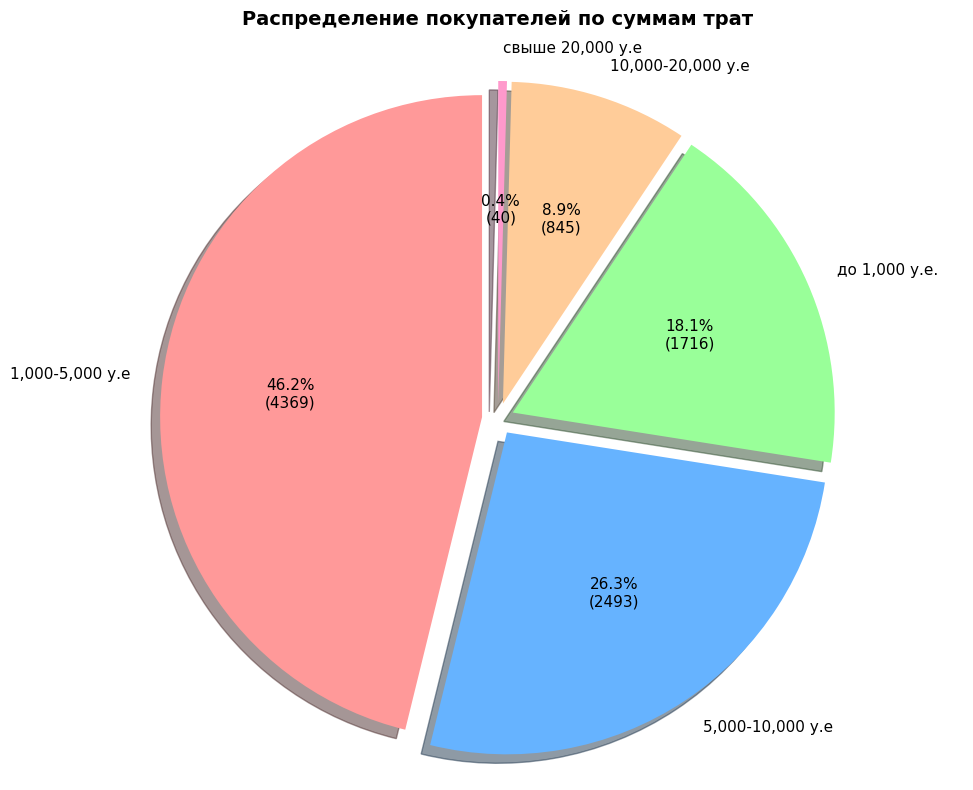

In [73]:
# Круговая диаграмма трат
plt.figure(figsize=(10, 8))
explode = (0.05, 0.05, 0.05, 0.05, 0.05)  # выдвигаем сектора

plt.pie(group_counts.values, 
        labels=group_counts.index, 
        autopct=lambda p: f'{p:.1f}%\n({int(p*sum(group_counts.values)/100)})',
        startangle=90,
        colors=colors,
        explode=explode,
        shadow=True,
        textprops={'fontsize': 11})
plt.title('Распределение покупателей по суммам трат\n', fontsize=14, fontweight='bold')
plt.axis('equal') 
plt.tight_layout()
plt.show()

## Задание 1 часть 3 количество денег, потраченных на дополнительные услуги и аксессуары. 

In [78]:
# Суммируем Add-on Total только по завершенным заказам
accessory_spending = df_completed.groupby('Customer ID')['Add-on Total'].sum().reset_index().rename(
    columns={'Add-on Total': 'Accessory Spending'}
)

In [94]:
print("=== ТРАТЫ НА ДОПОЛНИТЕЛЬНЫЕ УСЛУГИ И АКСЕССУАРЫ ===")
print(f"Обработано покупателей: {len(accessory_spending)}")

# Отчет по доп услугам

print("\n" + "="*60)
print("СТАТИСТИКА ПО ТРАТАМ НА ДОПОЛНИТЕЛЬНЫЕ УСЛУГИ")
print("="*60)

stats = accessory_spending['Accessory Spending'].describe()


# Анализ покупателей с допами
customers_with_addons = accessory_spending[accessory_spending['Accessory Spending'] > 0]
print(f"ПОКУПАТЕЛИ, КОТОРЫЕ ПОКУПАЛИ ДОПЫ:")
print(f"   • Количество: {len(customers_with_addons)} чел.")
print(f"   • Доля от всех покупателей: {len(customers_with_addons)/len(accessory_spending)*100:.1f}%")
print(f"   • Средние траты на допы (среди покупавших): {customers_with_addons['Accessory Spending'].mean():.2f} у.е")
print(f"   • Максимальные траты на допы: {customers_with_addons['Accessory Spending'].max():.2f} у.е")

# Статистика
print(f"\nСредние траты на допы на покупателя: {stats['mean']:.2f} у.е")
print(f"Стандартное отклонение: {stats['std']:.2f} у.е")
print(f"Минимальные траты на допы: {stats['min']:.2f} у.е")
print(f"25-й процентиль: {stats['25%']:.2f} у.е")
print(f"Медианные траты на допы: {stats['50%']:.2f} у.е")
print(f"75-й процентиль: {stats['75%']:.2f} у.е")
print(f"Максимальные траты на допы: {stats['max']:.2f} у.е")

# Дополнительная статистика
print(f"\nОбщая сумма трат на допы: {accessory_spending['Accessory Spending'].sum():.2f} у.е")
print(f"Самый большой чек на допы: {accessory_spending['Accessory Spending'].max():.2f} у.е")
print(f"Покупателей без допов: {len(accessory_spending[accessory_spending['Accessory Spending'] == 0])} чел.")


# Группировка по диапазонам трат на допы
print(f"\nРАСПРЕДЕЛЕНИЕ ПОКУПАТЕЛЕЙ ПО ТРАТАМ НА ДОПЫ:")
bins = [0, 25, 50, 100, 200, 700]
labels = ['1-25 у.е.', '26-50 у.е.', '51-100 у.е.', '101-200 у.е.', 'свыше 200 у.е.']
addon_spending_groups = pd.cut(accessory_spending['Accessory Spending'], bins=bins, labels=labels, include_lowest=True)

# Отдельно считаем покупателей без допов
zero_spending_count = (accessory_spending['Accessory Spending'] == 0).sum()

print(f"   • 0 у.е. (без допов): {zero_spending_count} чел. ({(zero_spending_count/len(accessory_spending))*100:.1f}%)")
for label in labels:
    count = (addon_spending_groups == label).sum()
    percentage = (count / len(accessory_spending)) * 100
    print(f"   • {label}: {count} чел. ({percentage:.1f}%)")

print("\n" + "="*60)

=== ТРАТЫ НА ДОПОЛНИТЕЛЬНЫЕ УСЛУГИ И АКСЕССУАРЫ ===
Обработано покупателей: 9466

СТАТИСТИКА ПО ТРАТАМ НА ДОПОЛНИТЕЛЬНЫЕ УСЛУГИ
ПОКУПАТЕЛИ, КОТОРЫЕ ПОКУПАЛИ ДОПЫ:
   • Количество: 7773 чел.
   • Доля от всех покупателей: 82.1%
   • Средние траты на допы (среди покупавших): 107.50 у.е
   • Максимальные траты на допы: 658.32 у.е

Средние траты на допы на покупателя: 88.27 у.е
Стандартное отклонение: 83.78 у.е
Минимальные траты на допы: 0.00 у.е
25-й процентиль: 26.11 у.е
Медианные траты на допы: 71.49 у.е
75-й процентиль: 127.50 у.е
Максимальные траты на допы: 658.32 у.е

Общая сумма трат на допы: 835595.24 у.е
Самый большой чек на допы: 658.32 у.е
Покупателей без допов: 1693 чел.

РАСПРЕДЕЛЕНИЕ ПОКУПАТЕЛЕЙ ПО ТРАТАМ НА ДОПЫ:
   • 0 у.е. (без допов): 1693 чел. (17.9%)
   • 1-25 у.е.: 2329 чел. (24.6%)
   • 26-50 у.е.: 1303 чел. (13.8%)
   • 51-100 у.е.: 2638 чел. (27.9%)
   • 101-200 у.е.: 2300 чел. (24.3%)
   • свыше 200 у.е.: 896 чел. (9.5%)



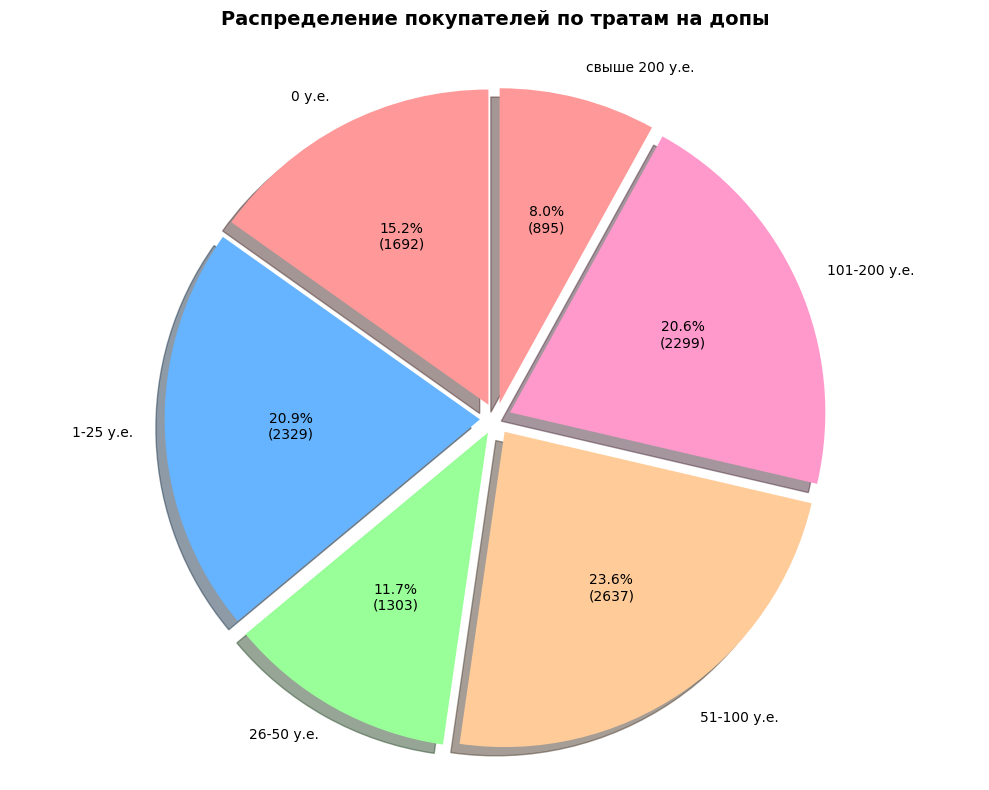

In [87]:
# КРУГОВАЯ ДИАГРАММА трат на дополнительные услуги
all_groups_data = [zero_spending_count] + [addon_spending_groups.value_counts().get(label, 0) for label in labels]
all_groups_labels = ['0 у.е.'] + labels

plt.figure(figsize=(10, 8))
explode = [0.05] * len(all_groups_labels)  # выдвигаем все сектора

plt.pie(all_groups_data, 
        labels=all_groups_labels, 
        autopct=lambda p: f'{p:.1f}%\n({int(p*sum(all_groups_data)/100)})',
        startangle=90,
        colors=colors,
        explode=explode,
        shadow=True,
        textprops={'fontsize': 10})
plt.title('Распределение покупателей по тратам на допы\n', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Задание 2

### Подготавливаем данные для анализа 

In [95]:
df_revenue = df_completed.copy()

# Преобразуем в формат datetime
df_revenue['Purchase Date'] = pd.to_datetime(df_revenue['Purchase Date'])
df_revenue['Year'] = df_revenue['Purchase Date'].dt.year
df_revenue['Month'] = df_revenue['Purchase Date'].dt.month
df_revenue['Quarter'] = df_revenue['Purchase Date'].dt.quarter

### Задание 2 пункт 1 доход каждому методу доставки

In [98]:
print("\n" + "="*50)
print("1. ДОХОД ПО МЕТОДАМ ДОСТАВКИ")
print("="*50)

# Доход по методам доставки
shipping_revenue = df_revenue.groupby('Shipping Type')['Total Price'].agg(['sum', 'count']).round(2)
shipping_revenue = shipping_revenue.rename(columns={'sum': 'Общий доход', 'count': 'Количество заказов'})
shipping_revenue['Средний чек'] = (shipping_revenue['Общий доход'] / shipping_revenue['Количество заказов']).round(2)

display(shipping_revenue)


1. ДОХОД ПО МЕТОДАМ ДОСТАВКИ


,Общий доход,Количество заказов,Средний чек
Shipping Type,,,
Expedited,8430385.58,2210,3814.65
Express,5632093.35,2227,2529.00
Overnight,5887722.52,2247,2620.26
Same Day,8292376.50,2187,3791.67
Standard,14387037.62,4561,3154.36


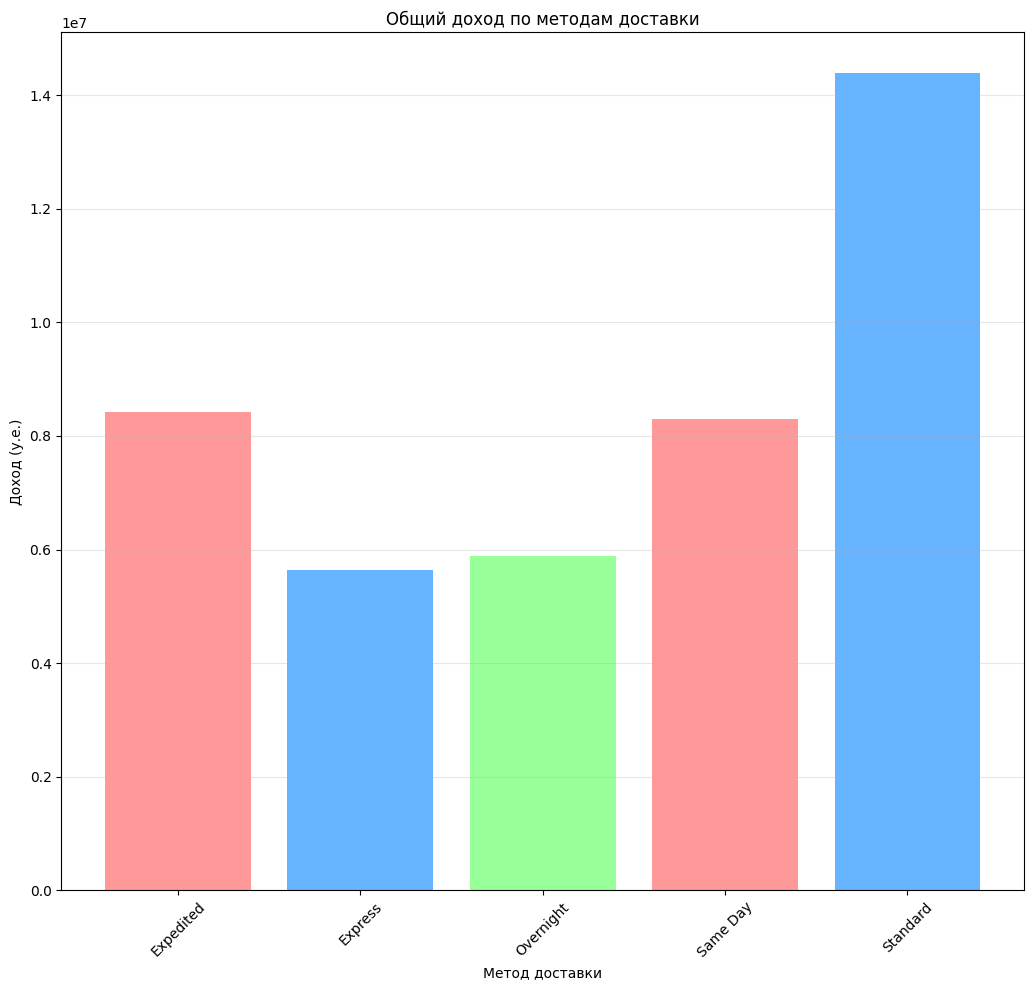

In [112]:
plt.figure(figsize=(30, 10))

plt.subplot(1, 3, 1)
plt.bar(shipping_revenue.index, shipping_revenue['Общий доход'], color=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Общий доход по методам доставки')
plt.xlabel('Метод доставки')
plt.ylabel('Доход (у.е.)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Задание 2 пункт 2 доход по каждому типу продукта 

In [116]:
print("\n" + "="*50)
print("2. ДОХОД ПО ТИПАМ ПРОДУКТОВ")
print("="*50)

# Доход по типам продуктов
product_revenue = df_revenue.groupby('Product Type')['Total Price'].agg(['sum', 'count']).round(2)
product_revenue = product_revenue.rename(columns={'sum': 'Общий доход', 'count': 'Количество продаж'})
product_revenue['Средняя цена'] = (product_revenue['Общий доход'] / product_revenue['Количество продаж']).round(2)

display(product_revenue)


2. ДОХОД ПО ТИПАМ ПРОДУКТОВ


,Общий доход,Количество продаж,Средняя цена
Product Type,,,
Headphones,2734651.00,1361,2009.30
Laptop,8365905.25,2686,3114.63
Smartphone,14407835.84,4004,3598.36
Smartwatch,9398591.23,2636,3565.47
Tablet,7722632.25,2745,2813.35


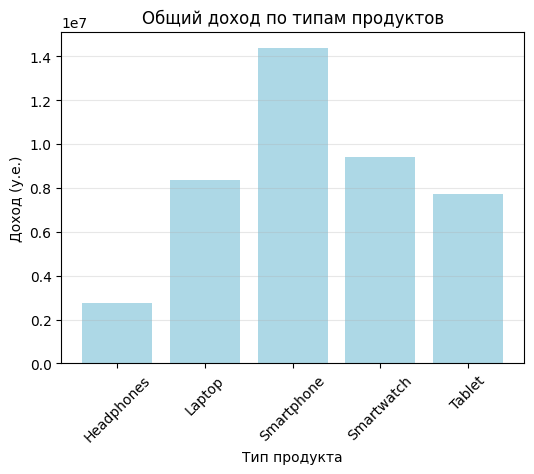

In [117]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(product_revenue.index, product_revenue['Общий доход'], color='lightblue')
plt.title('Общий доход по типам продуктов')
plt.xlabel('Тип продукта')
plt.ylabel('Доход (у.е.)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Задание 2 пункт 3 по дополнительным услугам за каждый месяц

In [122]:
print("\n" + "="*50)
print("3. ДОХОД ОТ ДОПОЛНИТЕЛЬНЫХ УСЛУГ ПО МЕСЯЦАМ")
print("="*50)

# Доход от допов по месяцам
monthly_addon_revenue = df_revenue.groupby(['Year', 'Month'])['Add-on Total'].agg(['sum', 'count']).reset_index()
monthly_addon_revenue = monthly_addon_revenue.rename(columns={'sum': 'Доход от допов', 'count': 'Количество заказов с допами'})
monthly_addon_revenue['Месяц'] = monthly_addon_revenue['Month'].astype(str) + '/' + monthly_addon_revenue['Year'].astype(str)

display(monthly_addon_revenue)


3. ДОХОД ОТ ДОПОЛНИТЕЛЬНЫХ УСЛУГ ПО МЕСЯЦАМ


,Year,Month,Доход от допов,Количество заказов с допами,Месяц
0,2023,9,5337.61,124,9/2023
1,2023,10,26153.21,613,10/2023
2,2023,11,24453.33,537,11/2023
3,2023,12,22750.23,525,12/2023
4,2024,1,93254.95,1399,1/2024
5,2024,2,80253.72,1227,2/2024
6,2024,3,84713.93,1323,3/2024
7,2024,4,82294.06,1284,4/2024
8,2024,5,89374.18,1371,5/2024
9,2024,6,84648.60,1349,6/2024


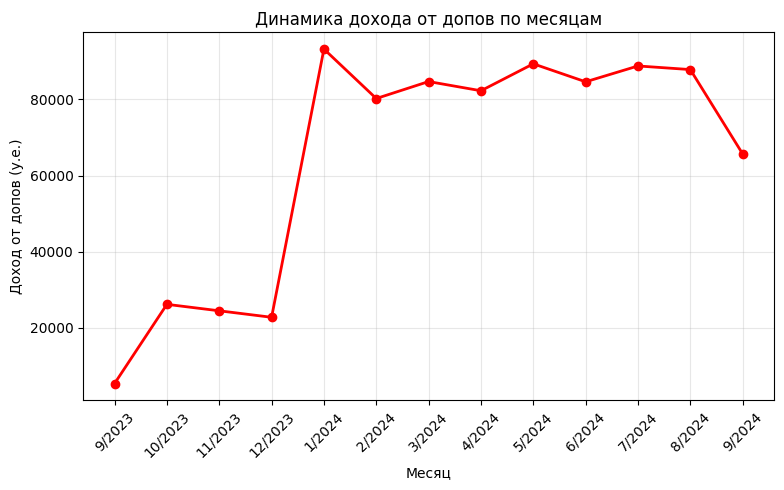

In [125]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(monthly_addon_revenue['Месяц'], monthly_addon_revenue['Доход от допов'], 
         marker='o', linewidth=2, markersize=6, color='red')
plt.title('Динамика дохода от допов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Доход от допов (у.е.)')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

### Задание 2 пункт 4 доход по дополнительным услугам за каждый квартал. 

In [129]:
print("\n" + "="*50)
print("4. ДОХОД ОТ ДОПОЛНИТЕЛЬНЫХ УСЛУГ ПО КВАРТАЛАМ")
print("="*50)

# Доход от допов по кварталам
quarterly_addon_revenue = df_revenue.groupby(['Year', 'Quarter'])['Add-on Total'].agg(['sum', 'count', 'mean']).reset_index()
quarterly_addon_revenue = quarterly_addon_revenue.rename(columns={
    'sum': 'Общий доход от допов', 
    'count': 'Количество заказов',
    'mean': 'Средний доход с заказа'
}).round(2)
quarterly_addon_revenue['Квартал'] = 'Кв' + quarterly_addon_revenue['Quarter'].astype(str) + ' ' + quarterly_addon_revenue['Year'].astype(str)

display(quarterly_addon_revenue)


4. ДОХОД ОТ ДОПОЛНИТЕЛЬНЫХ УСЛУГ ПО КВАРТАЛАМ


,Year,Quarter,Общий доход от допов,Количество заказов,Средний доход с заказа,Квартал
0,2023,3,5337.61,124,43.05,Кв3 2023
1,2023,4,73356.77,1675,43.80,Кв4 2023
2,2024,1,258222.60,3949,65.39,Кв1 2024
3,2024,2,256316.84,4004,64.02,Кв2 2024
4,2024,3,242361.42,3680,65.86,Кв3 2024


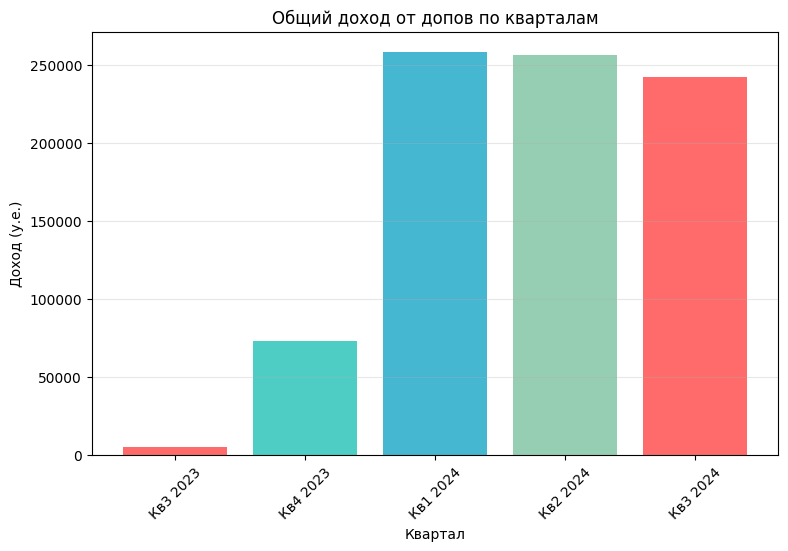

In [135]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.bar(quarterly_addon_revenue['Квартал'], quarterly_addon_revenue['Общий доход от допов'], 
        color=['#ff6b6b', '#4ecdc4', '#45b7d1', '#96ceb4'])
plt.title('Общий доход от допов по кварталам')
plt.xlabel('Квартал')
plt.ylabel('Доход (у.е.)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

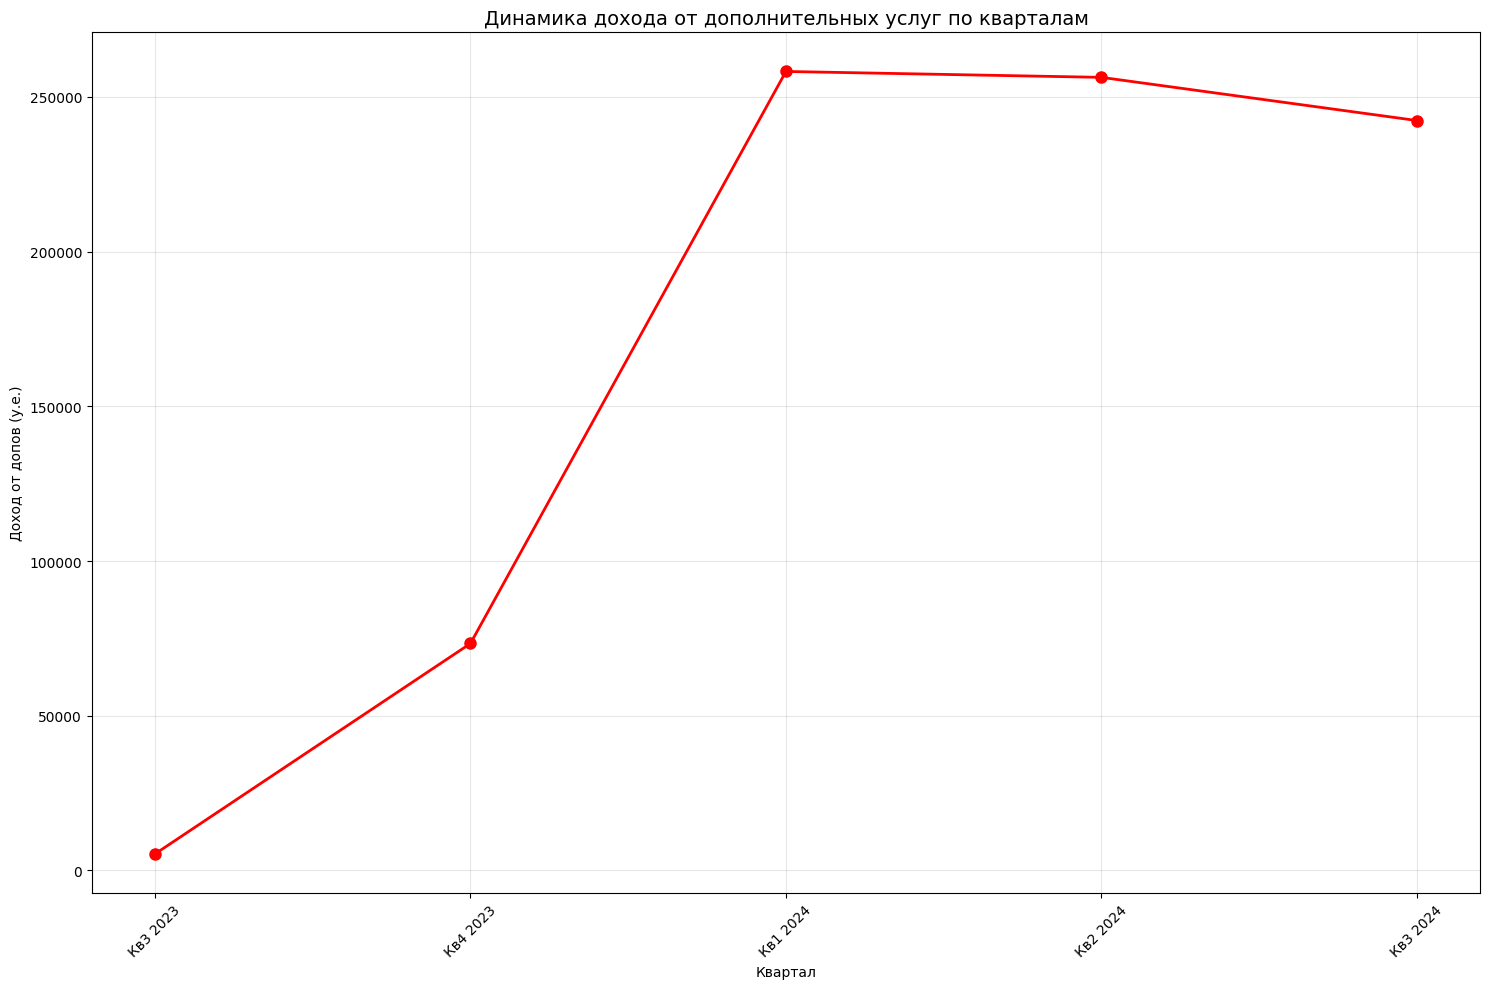

In [142]:
# График дохода по дополнительным услугам по кварталам
plt.figure(figsize=(15, 10))

plt.plot(quarterly_addon_revenue['Квартал'], quarterly_addon_revenue['Общий доход от допов'], 
         marker='o', linewidth=2, markersize=8, color='red', markerfacecolor='red')

plt.title('Динамика дохода от дополнительных услуг по кварталам', fontsize=14)
plt.xlabel('Квартал')
plt.ylabel('Доход от допов (у.е.)')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()